In [17]:
import pandas as pd
unique_mls = 'unique_mls_db.csv'
df = pd.read_csv(unique_mls, na_values='NULL')
df.head()

,mlsno,status,stno,stname,sttype,city,city_number,area,askprice,inputdate,...,type_number,style,bdrm,wshrm,latitude,longitude,house_condo,maint,aptno,address
0,C3320792,Sld,386,Eglinton,Ave,Toronto C10,23,Mount Pleasant East,615000,20/09/2015,...,8,Other,0,0,43.709510,-79.386210,house,NaN,NaN,"386 Eglinton Ave, Toronto"
1,C3683457,Sld,139,Christie,St,Toronto C02,36,Annex,499000,10/01/2017,...,1,Bungalow,2,1,43.667104,-79.419657,house,NaN,NaN,"139 Christie St, Toronto"
2,N3517852,Sld,200,Clark,Ave,Markham,2,Thornhill,699000,06/06/2016,...,1,Bungalow,1,1,43.811380,-79.404360,house,NaN,NaN,"200 Clark Ave, Markham"
3,C3686117,Sld,19,Addison,Cres,Toronto C13,54,Banbury-Don Mills,999000,15/01/2017,...,1,Bungalow,3,1,43.743602,-79.351473,house,NaN,NaN,"19 Addison Cres, Toronto"
4,C3697674,Sld,183,Bestview,Dr,Toronto C15,42,Bayview Woods-Steeles,988800,31/01/2017,...,1,2-Storey,4,4,43.805546,-79.383136,house,NaN,NaN,"183 Bestview Dr, Toronto"


In [18]:
is_bayview = df['city'] == 'Toronto C15'
is_under2m = df['soldprice'] <= 2000000
bayview2m = is_bayview & is_under2m
df_bayview2m = df[bayview2m]
df_bayview2m.shape

(3675, 23)

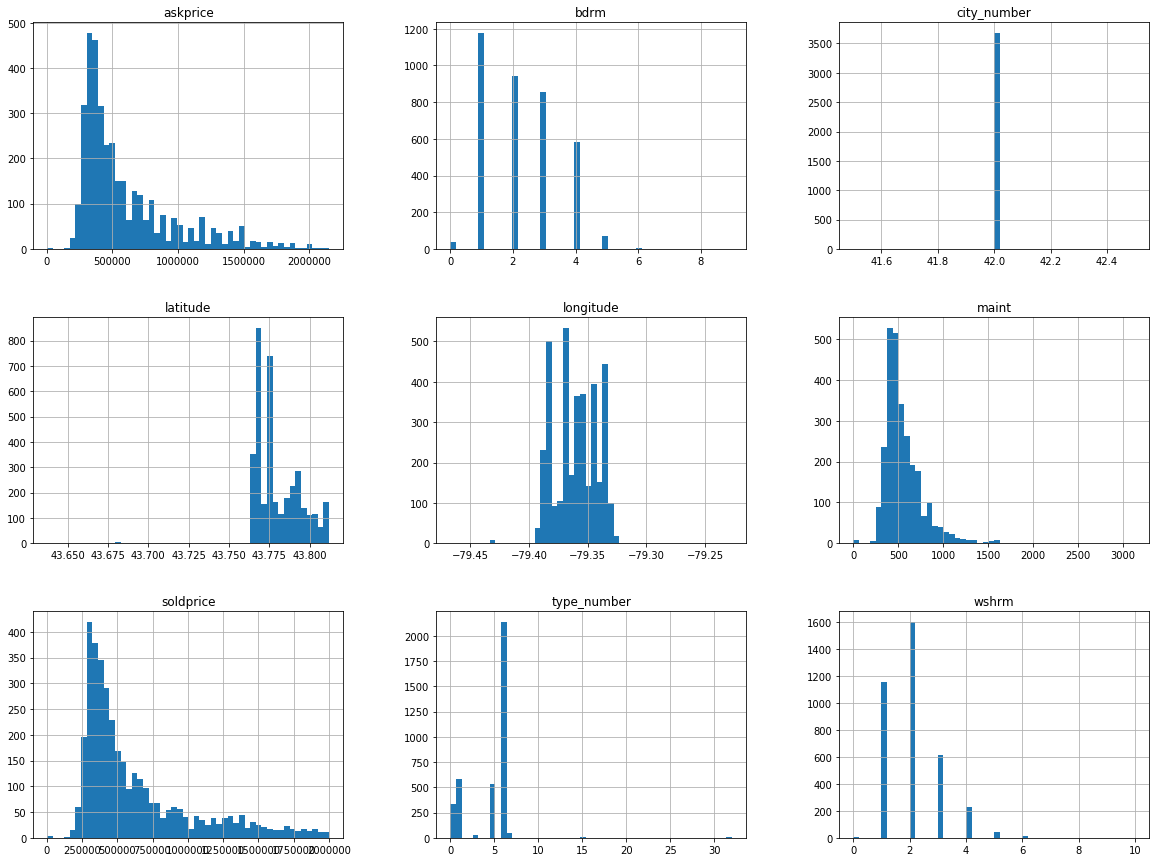

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
df_bayview2m.hist(bins=50, figsize=(20,15))
plt.savefig("attribute_histogram_plots")
plt.show()

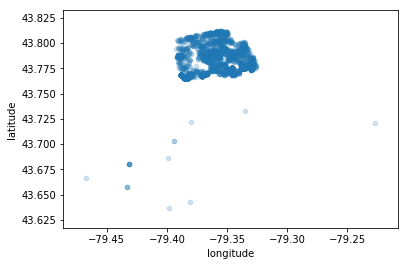

In [20]:
df_bayview2m.plot(kind="scatter", x="longitude", y="latitude", alpha=0.2)
plt.savefig('bayviewscatter.png')

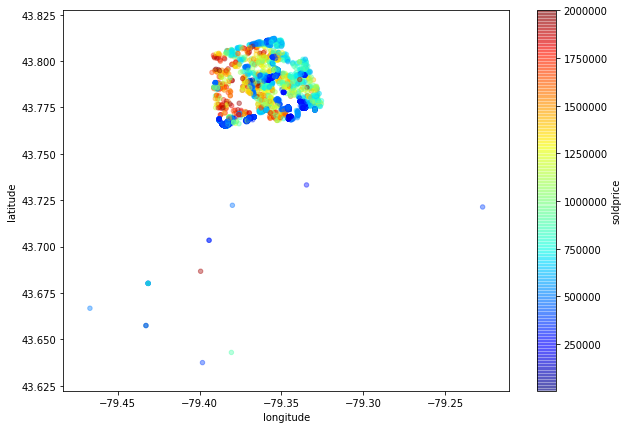

In [21]:
df_bayview2m.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, figsize=(10,7),
    c="soldprice", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)

In [22]:
corr_matrix = df_bayview2m.corr()
corr_matrix['soldprice'].sort_values(ascending=False)

soldprice      1.000000
askprice       0.977624
wshrm          0.717501
bdrm           0.685946
maint          0.475272
latitude       0.313199
longitude     -0.091301
type_number   -0.685543
city_number         NaN
Name: soldprice, dtype: float64

In [23]:
df_bayview2m.dtypes

mlsno           object
status          object
stno            object
stname          object
sttype          object
city            object
city_number      int64
area            object
askprice         int64
inputdate       object
soldprice        int64
solddate        object
type            object
type_number      int64
style           object
bdrm             int64
wshrm            int64
latitude       float64
longitude      float64
house_condo     object
maint          float64
aptno           object
address         object
dtype: object

In [24]:
df_bayview2m.head()

,mlsno,status,stno,stname,sttype,city,city_number,area,askprice,inputdate,...,type_number,style,bdrm,wshrm,latitude,longitude,house_condo,maint,aptno,address
4,C3697674,Sld,183,Bestview,Dr,Toronto C15,42,Bayview Woods-Steeles,988800,31/01/2017,...,1,2-Storey,4,4,43.805546,-79.383136,house,NaN,NaN,"183 Bestview Dr, Toronto"
21,C3596249,Sld,10,Tollerton,Ave,Toronto C15,42,Bayview Woods-Steeles,900000,06/09/2016,...,1,2-Storey,4,4,43.787232,-79.387055,house,NaN,NaN,"10 Tollerton Ave, Toronto"
89,C3526584,Sld,128,Argonne,Cres,Toronto C15,42,Bayview Woods-Steeles,928000,12/06/2016,...,1,2-Storey,5,4,43.795070,-79.386370,house,NaN,NaN,"128 Argonne Cres, Toronto"
95,C3500632,Sld,14,Paynter,Dr,Toronto C15,42,Hillcrest Village,998000,19/05/2016,...,1,2-Storey,4,4,43.807120,-79.364930,house,NaN,NaN,"14 Paynter Dr, Toronto"
169,C3742075,Sld,14,Zircon,Crt,Toronto C15,42,Hillcrest Village,899000,27/03/2017,...,1,Sidesplit 3,3,3,43.803097,-79.362779,house,NaN,NaN,"14 Zircon Crt, Toronto"


In [25]:
df_bayview2m.drop(df_bayview2m.columns[[0,1,4]], axis=1, inplace=True)

/Users/Minh/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
df_bayview2m.head()

,stno,stname,city,city_number,area,askprice,inputdate,soldprice,solddate,type,type_number,style,bdrm,wshrm,latitude,longitude,house_condo,maint,aptno,address
4,183,Bestview,Toronto C15,42,Bayview Woods-Steeles,988800,31/01/2017,1929999,14/02/2017,Detached,1,2-Storey,4,4,43.805546,-79.383136,house,NaN,NaN,"183 Bestview Dr, Toronto"
21,10,Tollerton,Toronto C15,42,Bayview Woods-Steeles,900000,06/09/2016,1608800,12/09/2016,Detached,1,2-Storey,4,4,43.787232,-79.387055,house,NaN,NaN,"10 Tollerton Ave, Toronto"
89,128,Argonne,Toronto C15,42,Bayview Woods-Steeles,928000,12/06/2016,1528800,27/06/2016,Detached,1,2-Storey,5,4,43.795070,-79.386370,house,NaN,NaN,"128 Argonne Cres, Toronto"
95,14,Paynter,Toronto C15,42,Hillcrest Village,998000,19/05/2016,1640000,22/05/2016,Detached,1,2-Storey,4,4,43.807120,-79.364930,house,NaN,NaN,"14 Paynter Dr, Toronto"
169,14,Zircon,Toronto C15,42,Hillcrest Village,899000,27/03/2017,1430000,29/03/2017,Detached,1,Sidesplit 3,3,3,43.803097,-79.362779,house,NaN,NaN,"14 Zircon Crt, Toronto"


In [28]:
df_bayview2m.drop(df_bayview2m.columns[[10,11,17,18]], axis=1, inplace=True)

/Users/Minh/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df_bayview2m.head()

,stno,stname,city,city_number,area,askprice,inputdate,soldprice,solddate,type,bdrm,wshrm,latitude,longitude,house_condo,address
4,183,Bestview,Toronto C15,42,Bayview Woods-Steeles,988800,31/01/2017,1929999,14/02/2017,Detached,4,4,43.805546,-79.383136,house,"183 Bestview Dr, Toronto"
21,10,Tollerton,Toronto C15,42,Bayview Woods-Steeles,900000,06/09/2016,1608800,12/09/2016,Detached,4,4,43.787232,-79.387055,house,"10 Tollerton Ave, Toronto"
89,128,Argonne,Toronto C15,42,Bayview Woods-Steeles,928000,12/06/2016,1528800,27/06/2016,Detached,5,4,43.795070,-79.386370,house,"128 Argonne Cres, Toronto"
95,14,Paynter,Toronto C15,42,Hillcrest Village,998000,19/05/2016,1640000,22/05/2016,Detached,4,4,43.807120,-79.364930,house,"14 Paynter Dr, Toronto"
169,14,Zircon,Toronto C15,42,Hillcrest Village,899000,27/03/2017,1430000,29/03/2017,Detached,3,3,43.803097,-79.362779,house,"14 Zircon Crt, Toronto"


In [30]:
df_bayview2m.shape

(3675, 16)